In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [4]:
df = pd.read_csv(r"C:\Users\mrmhm\Desktop\Stocks-Dataset\AAPL_2006-01-01_to_2018-01-01.csv")

# Dataset Analysis

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [9]:
df.shape

(3019, 7)

In [10]:
df.size

21133

In [12]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


# Data Distribution

In [21]:
def dist(df, col):
    plt.figure(figsize=(12, 6))
    plt.hist(df[col], bins=365, color='blue', edgecolor='black')
    plt.title(f"Distribution of {col} Prices", fontsize = 15)
    plt.xlabel("Closing Price", fontsize = 12)
    plt.ylabel("Frequency")
    plt.show()

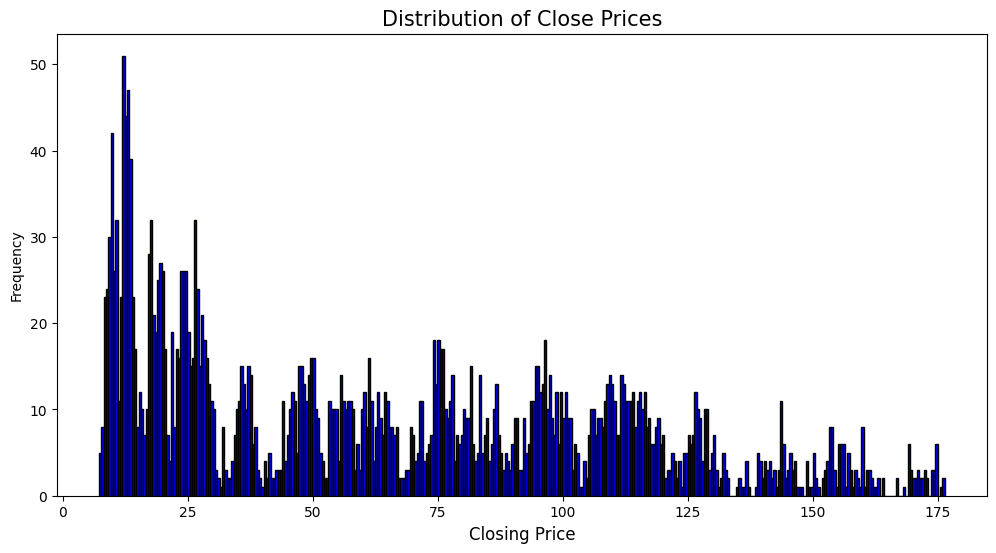

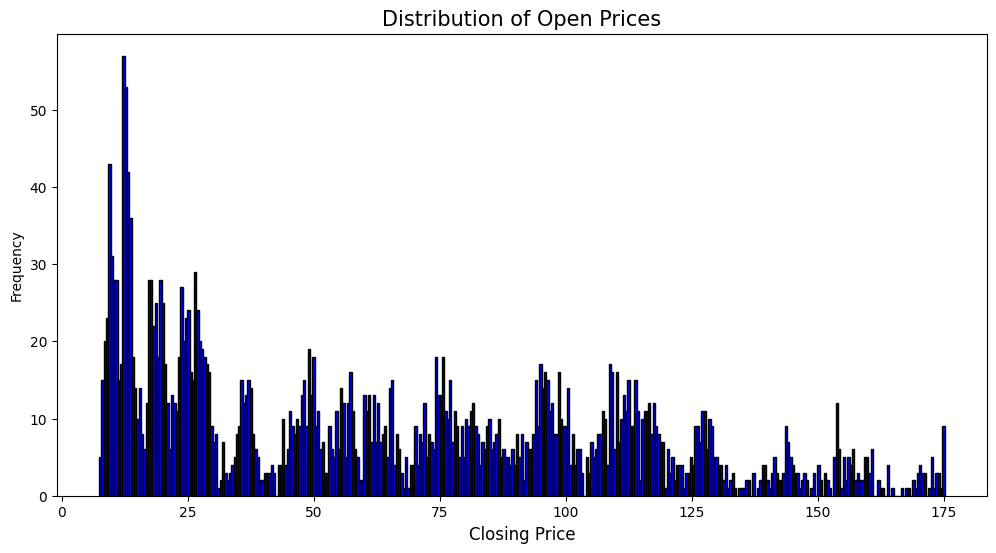

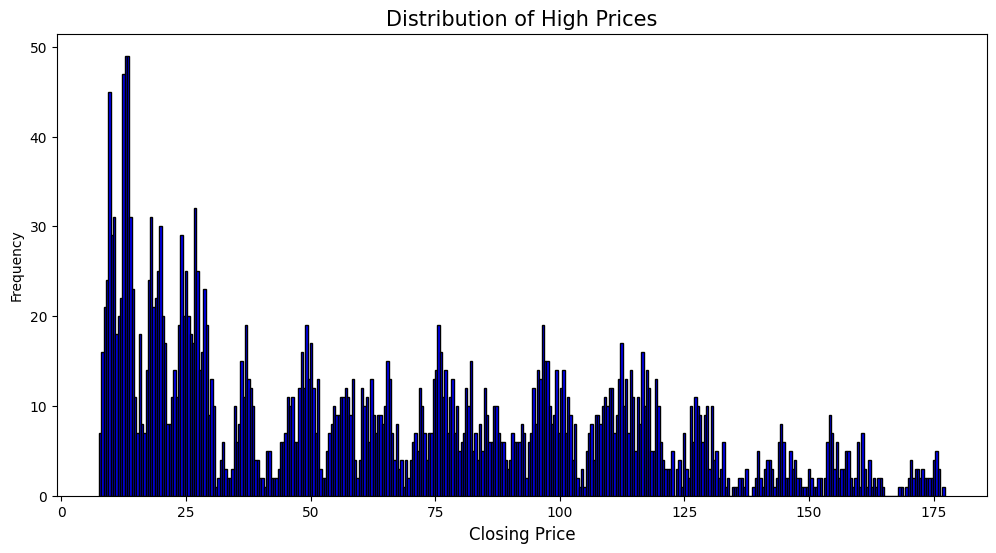

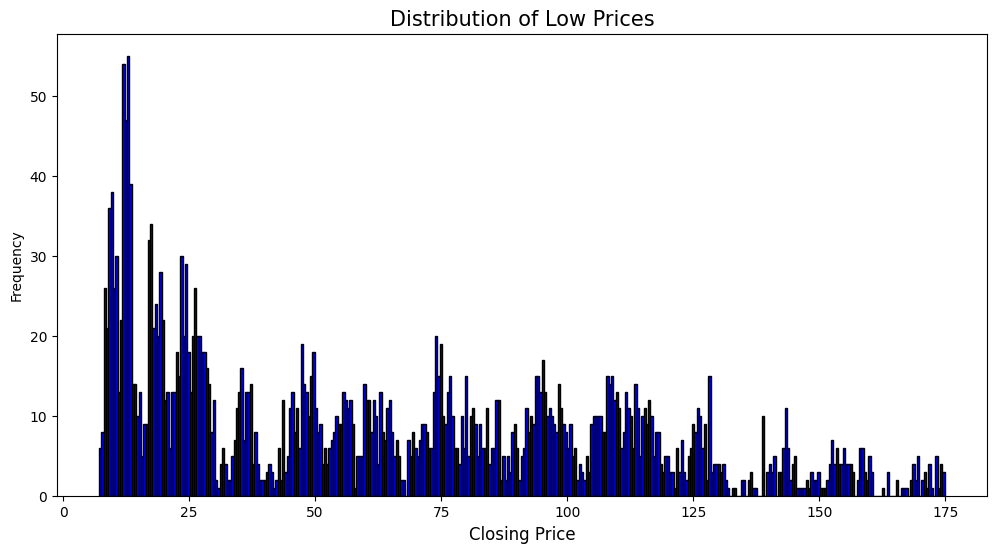

In [23]:
for col in ['Close', 'Open', 'High', 'Low']:
    dist(df, col)

# Prices Over Time

In [24]:
# Changing dtype of Date column to datetime dtype.
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
def price_over_time(df, col):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[col])
    plt.title(f"{col} Changes Over Time", fontsize=15)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel(f"{col} Price", fontsize=12)
    plt.tight_layout()
    plt.show()

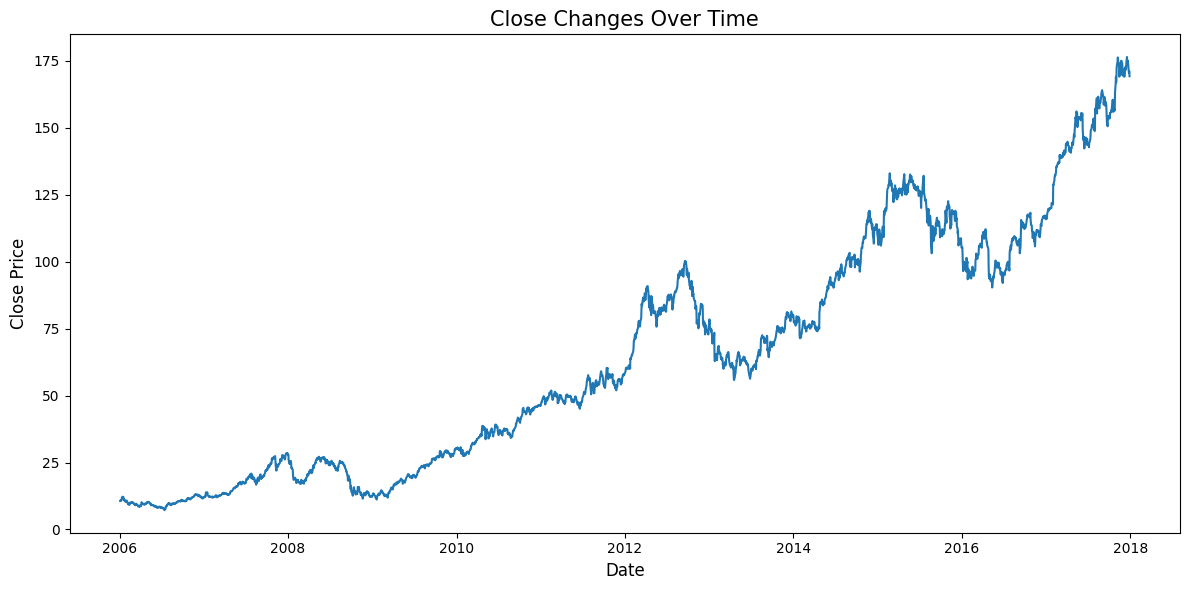

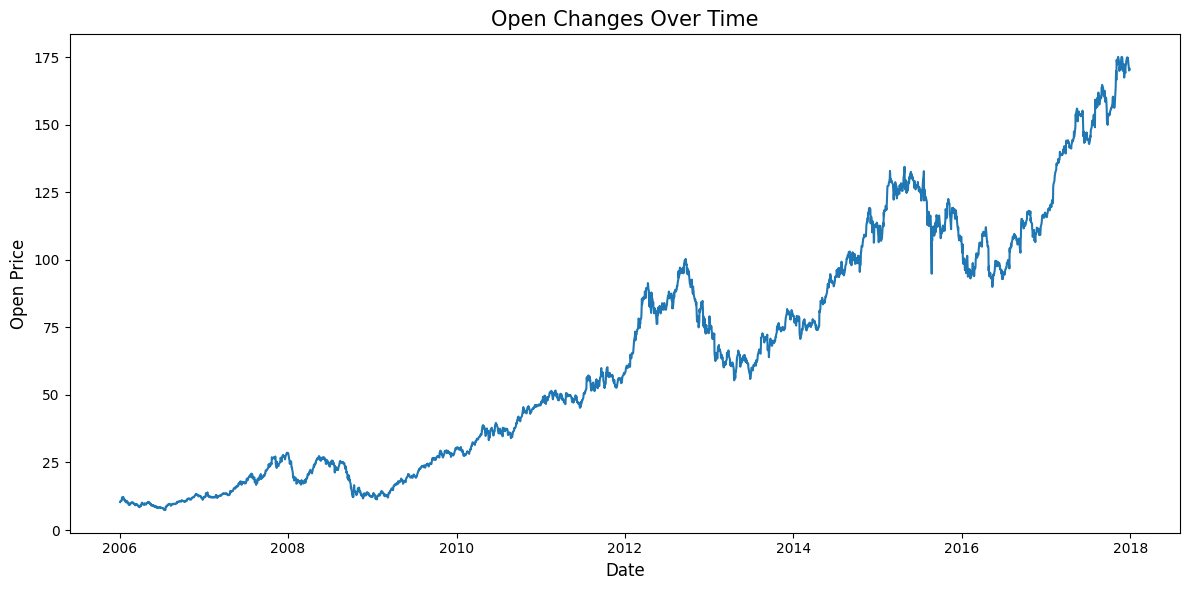

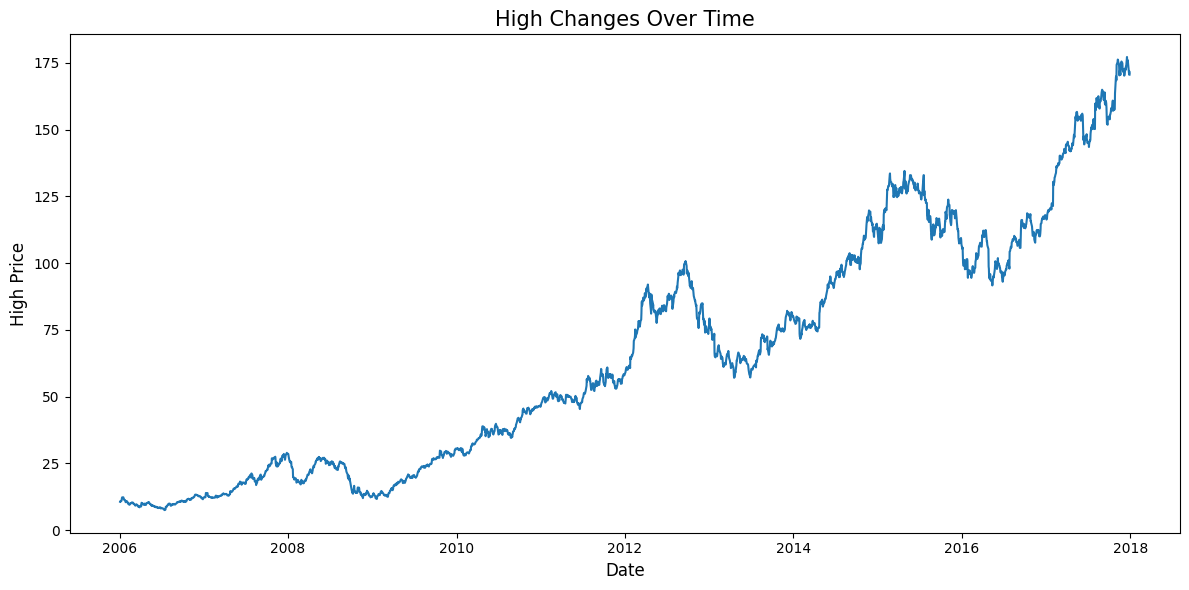

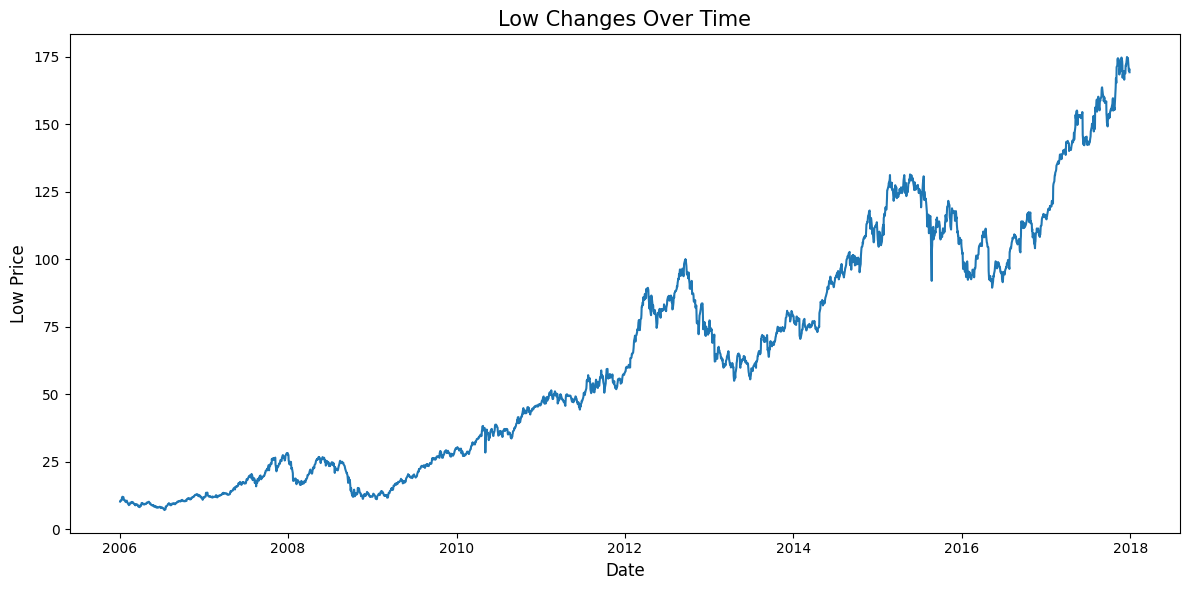

In [28]:
for col in ['Close', 'Open', 'High', 'Low']:
    price_over_time(df, col)

# Correlation Matrix

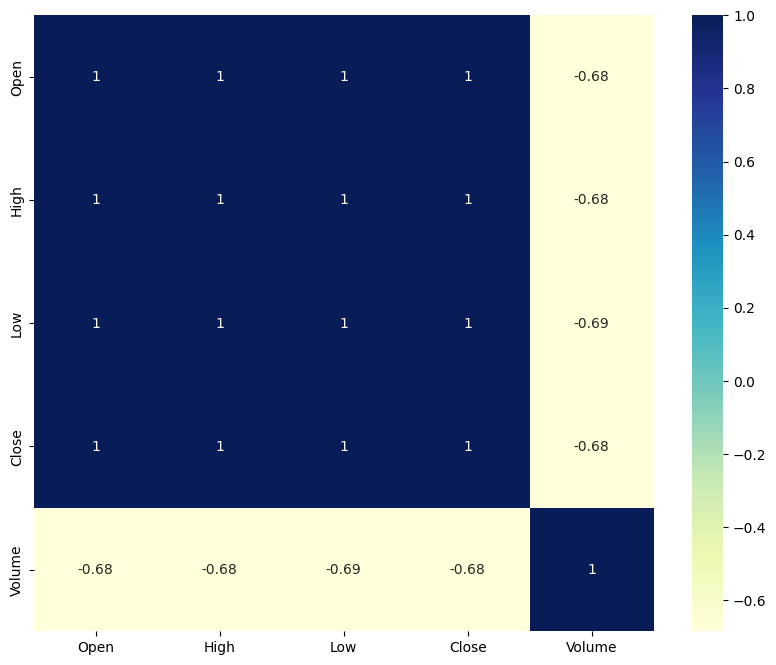

In [34]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [37]:
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999902,0.999870,0.999777,-0.681889
High,0.999902,1.000000,0.999844,0.999896,-0.680395
Low,0.999870,0.999844,1.000000,0.999898,-0.685059
Close,0.999777,0.999896,0.999898,1.000000,-0.682723
Volume,-0.681889,-0.680395,-0.685059,-0.682723,1.000000


# Boxplot - To Identify Outliers

In [44]:
def boxplot(df, col):
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[col], showmeans=True)
    plt.title(f"{col} Boxplot", fontsize=15)
    plt.xlabel(f"{col}")
    plt.show()

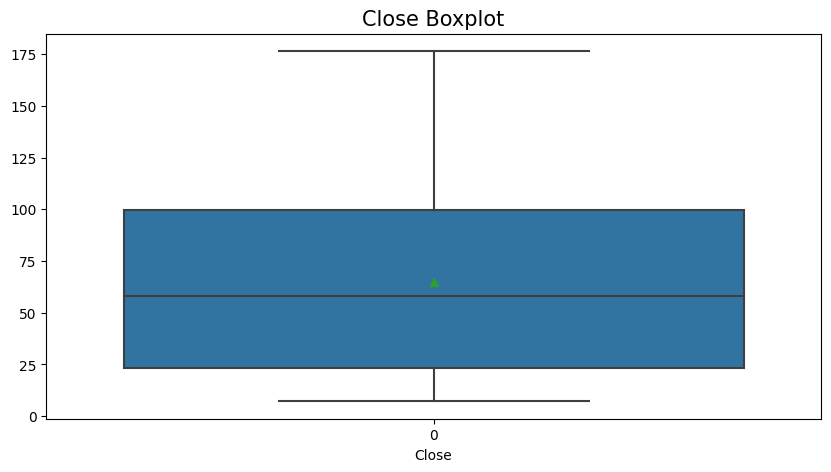

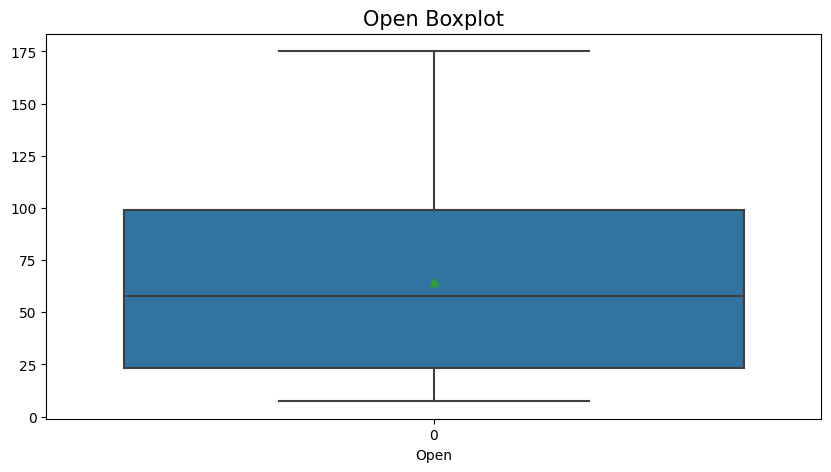

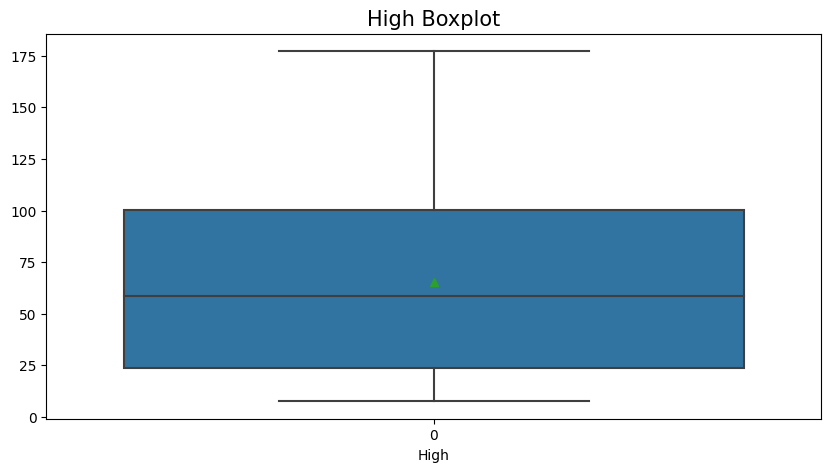

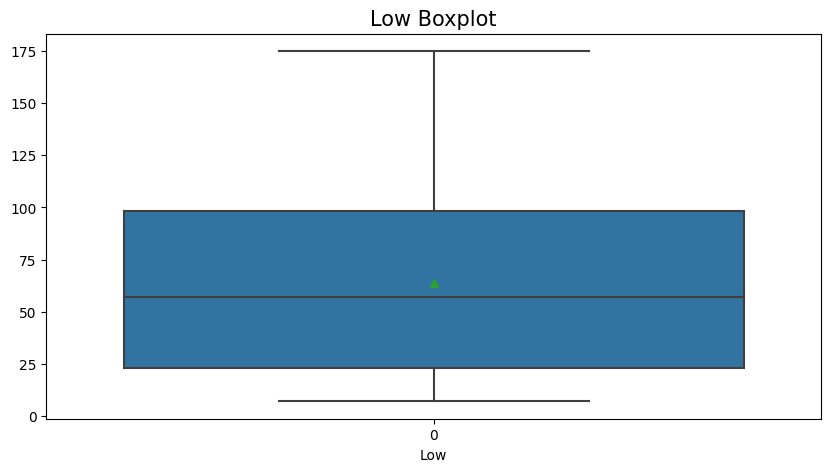

In [45]:
for col in ['Close', 'Open', 'High', 'Low']:
    boxplot(df, col)

# Moving Average 50

In [46]:
# Calculate and add MA_50
df['MA_50'] = df['Close'].rolling(window=50).mean()

In [52]:
def moving_average(df, col):
    plt.figure(figsize=(16, 8))
    plt.plot(df['Date'], df[col], label=f"{col} Price")
    plt.plot(df["Date"], df['MA_50'], label='50-Day MA')
    plt.legend(fontsize=10)
    plt.tight_layout
    plt.show()

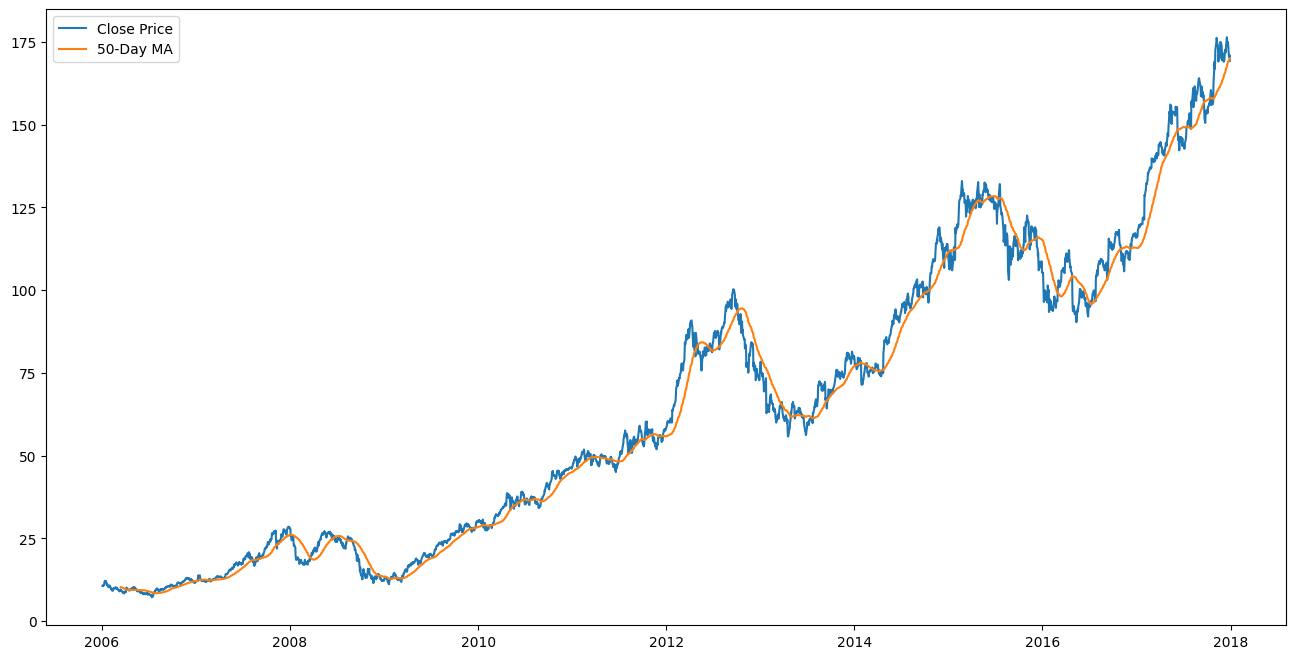

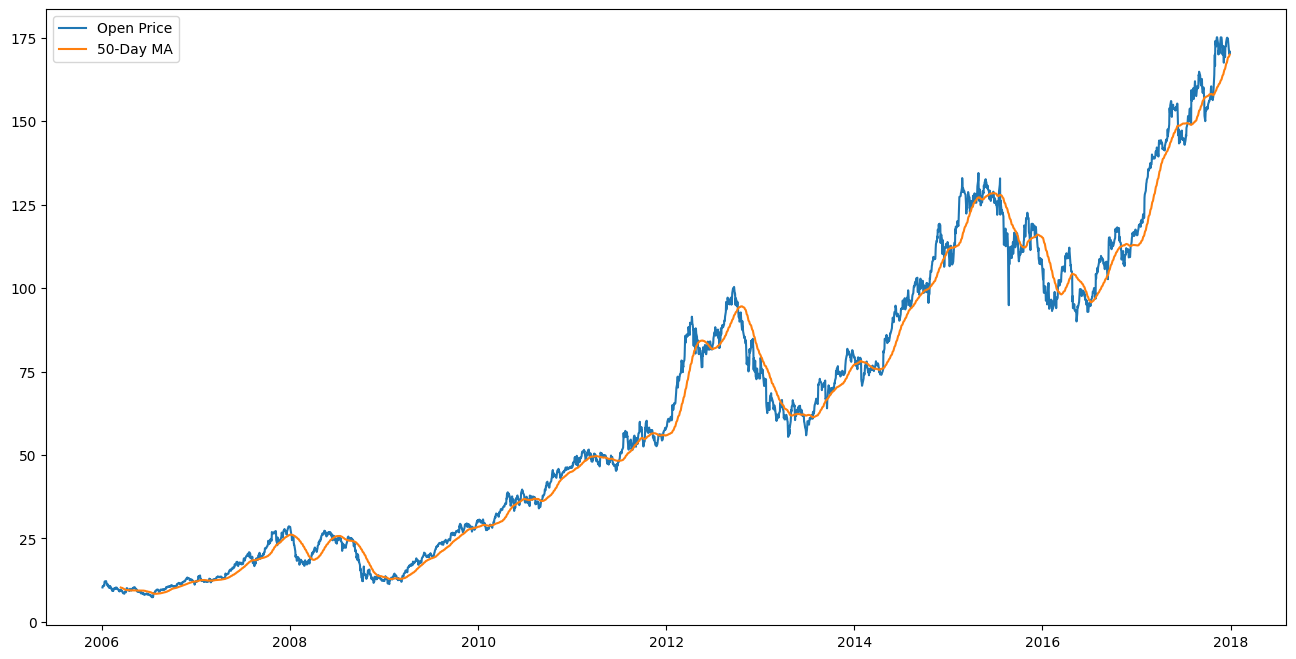

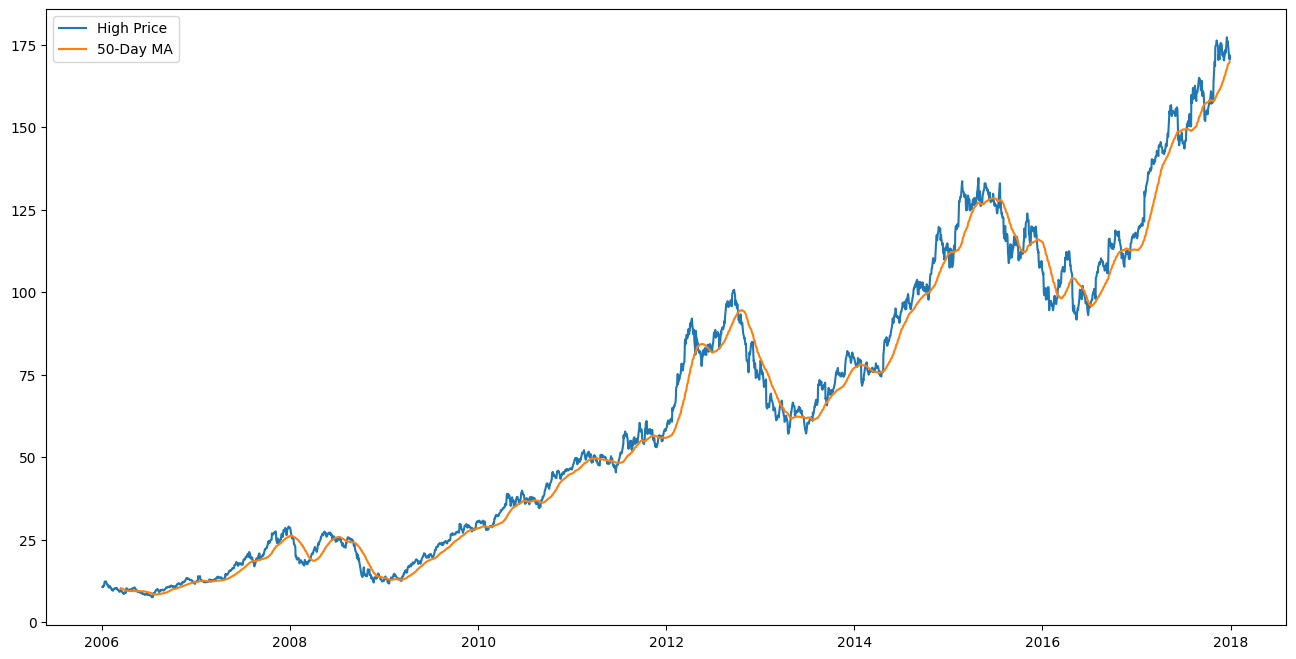

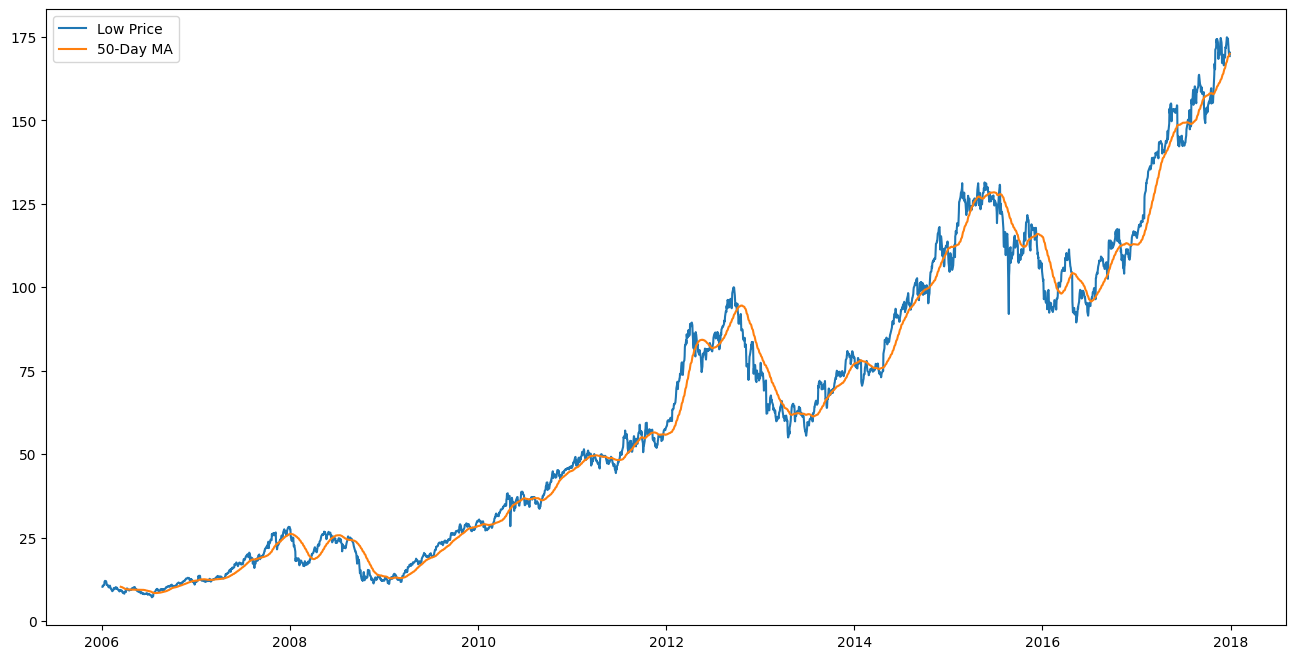

In [53]:
for col in ['Close', 'Open', 'High', 'Low']:
    moving_average(df, col)

# Daily Returns

In [54]:
# Calulate and add Daily_Return
df['Daily_Ret'] = df['Close'].pct_change()

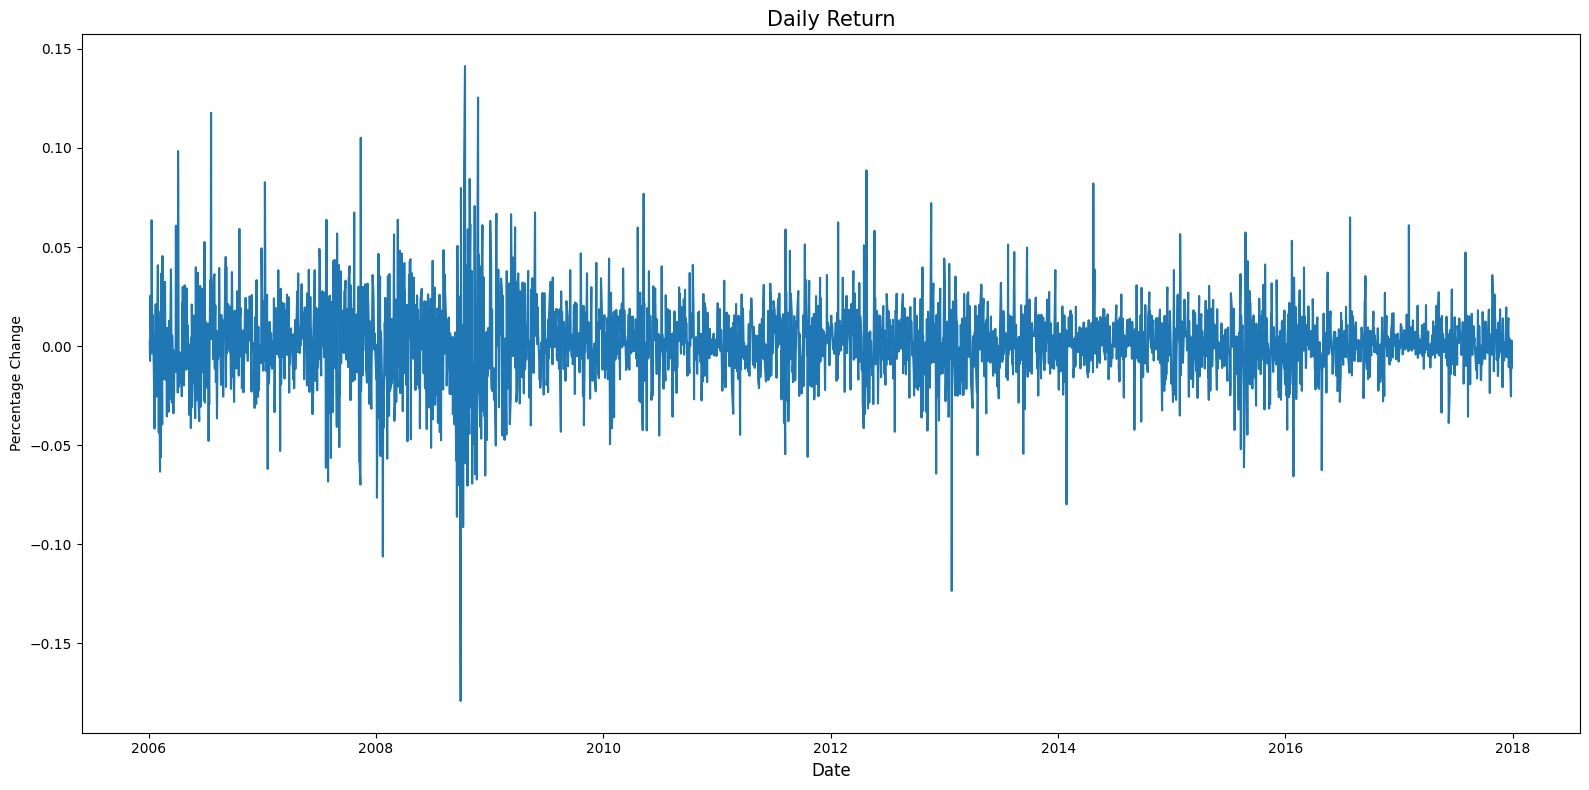

In [56]:
plt.figure(figsize=(16, 8))
plt.plot(df['Date'], df['Daily_Ret'])
plt.title("Daily Return", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percentage Change")
plt.tight_layout()
plt.show()

# Volume Trends

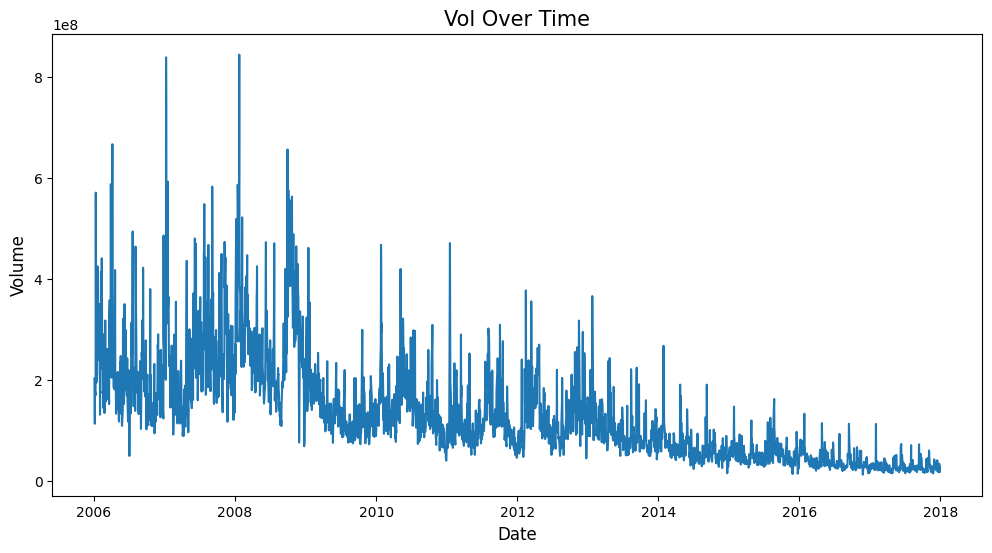

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'])
plt.title("Vol Over Time", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.show()

# Season Decomposition

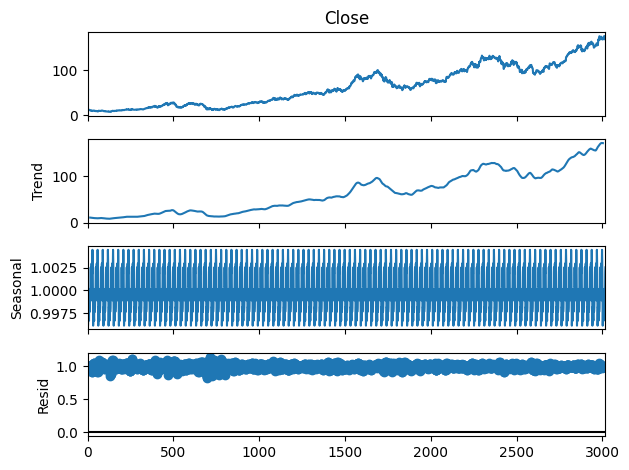

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
result.plot()
plt.show()

# Scatter Plot

In [59]:
def scatter(df, col1, col2):
    plt.figure(figsize=(12, 6))
    plt.scatter(df[col1], df[col2])
    plt.title(f"{col1} Vs. {col2}", fontsize=15)
    plt.xlabel(f"{col1}", fontsize=12)
    plt.ylabel(f"{col2}", fontsize=12)
    plt.show()

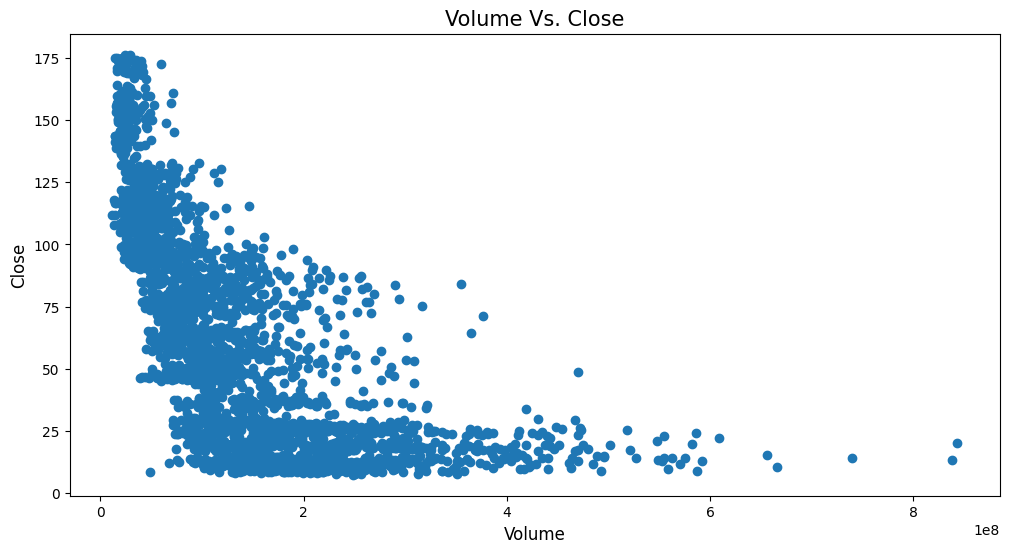

In [60]:
scatter(df, 'Volume', 'Close')

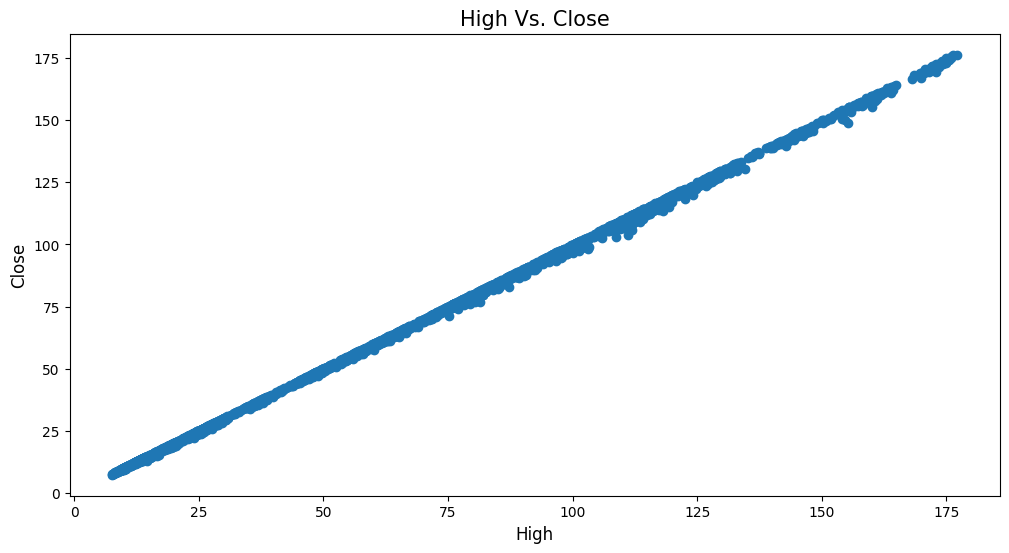

In [65]:
scatter(df, 'High', 'Close')

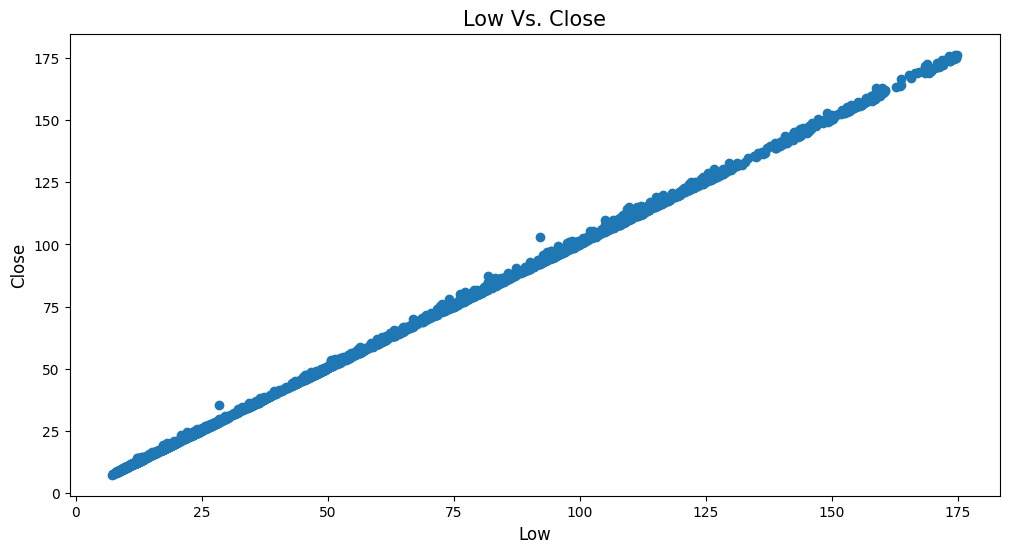

In [66]:
scatter(df, 'Low', 'Close')

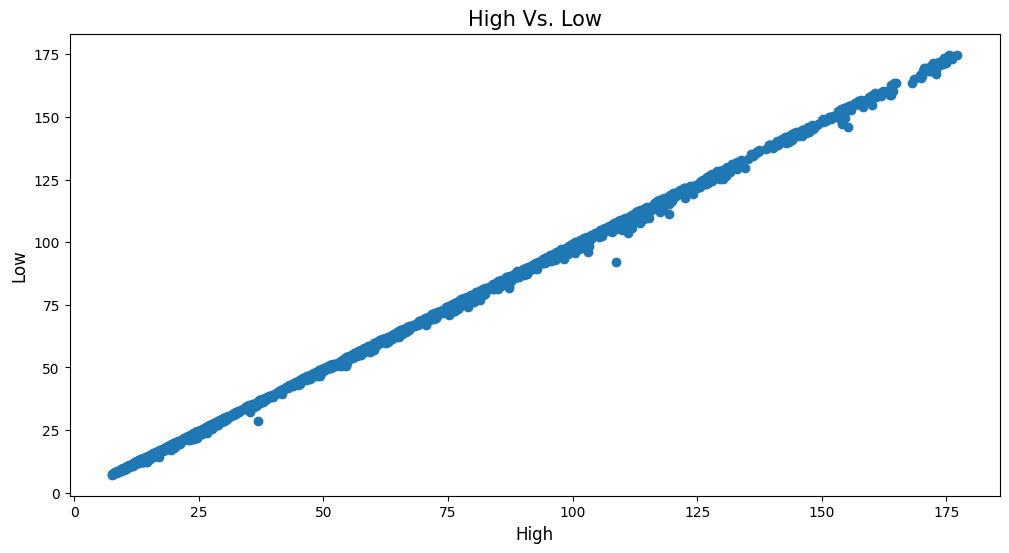

In [67]:
scatter(df, 'High', 'Low')

# Exploring Relationship between Close and Trading Volume

<Figure size 1200x600 with 0 Axes>

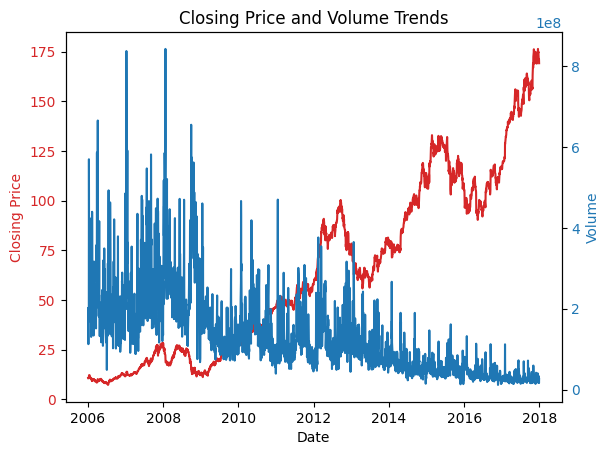

In [96]:
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(df['Date'], df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volume', color=color)
ax2.plot(df['Date'], df['Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Closing Price and Volume Trends')
plt.show()

# Seasonal Changes

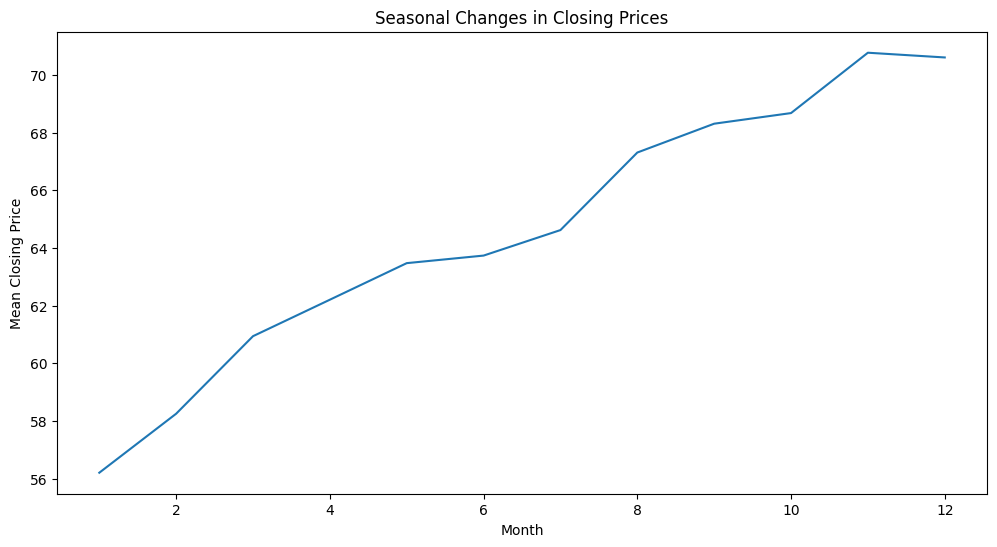

In [99]:
monthly_mean = df.groupby(df['Date'].dt.month)['Close'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean.index, monthly_mean.values)
plt.title('Seasonal Changes in Closing Prices')
plt.xlabel('Month')
plt.ylabel('Mean Closing Price')
plt.show()

# Inferential Analysis

In [73]:
from scipy.stats import t, ttest_1samp

# Estimate Mean Closing Price

In [87]:
np.random.seed(42)

# Number of Samples and Sample size of 'Close' feature
num_sample = 10
sample_size = 100

# Recording data
sample_means = []
confidence_intervals = []
confidence_levels = []
pop_mean_estimators = []

# Generate and Analyze Samples
for _ in range(num_sample):
    # Generate a random sample
    sample = np.random.choice(df['Close'], sample_size, replace=True)

    # Calculate means
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

    # Calculate Standard Error
    standard_error = stats.sem(sample)
    # Caculate Margin of Error
    cl = 0.95
    margin_of_error = stats.norm.ppf((1 + cl) / 2) * standard_error
    # Confidence Interval
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    confidence_intervals.append(confidence_interval)

# Print results
for i in range(num_sample):
    print(f"Sample {i + 1}:")
    print(f"  Sample Mean: {sample_means[i]}")
    print(f"  Margin of Error: {margin_of_error}")
    print(f"  Confidence Interval: {confidence_intervals[i]}\n")

Sample 1:
  Sample Mean: 67.824
  Margin of Error: 8.462134445919212
  Confidence Interval: (58.49106433370795, 77.15693566629204)

Sample 2:
  Sample Mean: 65.8051
  Margin of Error: 8.462134445919212
  Confidence Interval: (58.182589730744155, 73.42761026925584)

Sample 3:
  Sample Mean: 70.8719
  Margin of Error: 8.462134445919212
  Confidence Interval: (61.960644325034444, 79.78315567496554)

Sample 4:
  Sample Mean: 63.0361
  Margin of Error: 8.462134445919212
  Confidence Interval: (54.026183597677495, 72.0460164023225)

Sample 5:
  Sample Mean: 63.2073
  Margin of Error: 8.462134445919212
  Confidence Interval: (54.02436364150407, 72.39023635849593)

Sample 6:
  Sample Mean: 67.11699999999999
  Margin of Error: 8.462134445919212
  Confidence Interval: (58.179203172256166, 76.05479682774381)

Sample 7:
  Sample Mean: 64.1987
  Margin of Error: 8.462134445919212
  Confidence Interval: (55.439554144010856, 72.95784585598915)

Sample 8:
  Sample Mean: 62.09680000000001
  Margin of E

In [84]:
estimate_pop_mean = np.mean(sample_means)
estimate_pop_std = np.std(sample_means)
population_mean_ci = stats.norm.interval(cl, loc=estimate_pop_mean, scale=estimate_pop_std)

In [86]:
print(f"Estimate Mean of Population: {estimate_pop_mean}")
print(f"Confidence Interval: {population_mean_ci}")
print(f"True Population Mean: {np.mean(df['Close'])}")

Estimate Mean of Population: 65.72923
Confidence Interval: (60.78536871598124, 70.67309128401877)
True Population Mean: 64.66289168598874


1. For each sample, we generate a sample mean, calculates the margin of error, and constructs a 95% confidence interval.
2. Then we calculate an estimate for the population mean based on the sample means.
3. The estimated population mean is 65.72923 with a 95% confidence interval of (60.79, 70.67).
4. The true population mean of the 'Close' feature in the original dataset is 64.66.
5. The estimate for the population mean falls within the confidence interval, indicating consistency between the estimate and the sample data.
6. The true population mean is also within the calculated confidence interval, supporting the accuracy of the estimation.val, with the estimate aligning well with the true population mean from the original dataset.e estimation.

# Mean Hypothesis Test (t-test)

__H0: The estimated population mean is equal to the true population mean.__   

__H1: The estimated population mean is not equal to the true population mean.__

In [91]:
# One-Sample ttest
t_stats, p_value = stats.ttest_1samp(sample_means, np.mean(df['Close']))
# Alpha
alpha = 0.05

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the estimated population mean is different from the true population mean.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference between the estimated and true population means.")

T-statistic: 0.0
P-value: 0.23653821659095287
Fail to reject the null hypothesis. There is not enough evidence to suggest a difference between the estimated and true population means.
